<a href="https://colab.research.google.com/github/ohjisu320/study_data_analytics/blob/main/docs/quests/CDAs/CDA_fruitstore_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설치
- !apt-get install -y fonts-nanum
- !fc-cache -fv
- !rm ~/.cache/matplotlib -rf

  - 설치 후 colab ruddn runtime > restart session 필요

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 전처리 : 결측치 처리

In [3]:
df_gro =pd.read_csv('fruitstore_saleshistory.csv')

In [4]:
condition = "물품중분류 =='과일'"
df_fruit = df_gro.query(condition)
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15402 entries, 0 to 705478
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   공급일자      15402 non-null  object 
 1   요일        15402 non-null  object 
 2   공급월       15402 non-null  int64  
 3   공급주차      15402 non-null  int64  
 4   회원번호      15402 non-null  int64  
 5   조합원상태     15402 non-null  object 
 6   물품대분류     15402 non-null  object 
 7   물품중분류     15402 non-null  object 
 8   물품소분류     15402 non-null  object 
 9   물품명       15402 non-null  object 
 10  구매수량      15402 non-null  float64
 11  주소-구      15402 non-null  object 
 12  주소-동      15402 non-null  object 
 13  성별        15402 non-null  object 
 14  연령        15402 non-null  float64
 15  연령대       15402 non-null  object 
 16  구매금액      15402 non-null  int64  
 17  구매매장      15402 non-null  object 
 18  반품_원거래일자  325 non-null    float64
 19  구매시각      15402 non-null  object 
dtypes: float64(3), int64(4), ob

In [5]:
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
62,2018-01-02,화,1,1,445131904,정상회원,과실,과일,건대추,건대추(500g),1.0,수지구,풍덕천동,여,58.0,50대,22973,매장C,NaN,12:18
132,2018-01-02,화,1,1,744508416,정상회원,과실,과일,귤(조생),귤/유(1.5kg),1.0,기흥구,보정동,여,63.0,60대,11104,매장C,NaN,14:58
187,2018-01-02,화,1,1,281649856,정상회원,과실,과일,귤(조생),귤/유(1.5kg),1.0,수지구,풍덕천동,여,41.0,40대,11104,매장C,NaN,16:49
220,2018-01-02,화,1,1,548171456,정상회원,과실,과일,배,배(대:3개),1.0,수지구,풍덕천동,여,52.0,50대,16847,매장C,NaN,18:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705342,2018-06-30,토,6,26,862820992,정상회원,과실,과일,황매실,황매실(남고)/유(5kg),-2.0,수지구,성복동,남,53.0,50대,-111036,매장D,20180629.0,13:55
705354,2018-06-30,토,6,26,1553271552,정상회원,과실,과일,황매실,황매실(남고)/유(5kg),2.0,수지구,신봉동,여,45.0,40대,111036,매장D,NaN,12:49
705429,2018-06-30,토,6,26,606984384,정상회원,과실,과일,산딸기,냉동산딸기(250g),3.0,수지구,풍덕천동,여,51.0,50대,35608,매장B,NaN,19:34
705467,2018-06-30,토,6,26,1145758912,정상회원,과실,과일,사과,사과/(2kg)/소,1.0,수지구,상현동,여,37.0,30대이하,13592,매장B,NaN,18:11


In [6]:
#  컬럼 이름 변경
df_fruit = df_fruit.rename(columns={'주소-구': '주소_구'})
df_fruit = df_fruit.rename(columns={'주소-동': '주소_동'})

In [7]:
df_fruit.columns

Index(['공급일자', '요일', '공급월', '공급주차', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류',
       '물품명', '구매수량', '주소_구', '주소_동', '성별', '연령', '연령대', '구매금액', '구매매장',
       '반품_원거래일자', '구매시각'],
      dtype='object')

# 과일 유형(X)과 고객 세그먼트(Y) 사이에 연관성이 있습니까?
- 분석 방법: 카이제곱 독립성 검정을 사용하여 서로 다른 고객 세그먼트에 걸쳐 과일 유형의 판매 분포가 독립적인지 평가합니다.
- 고객 세그먼트 방법 : 구매매장, 성별, 연령대 별 세그먼트
  - 귀무가설 : 과일 유형(X)과 고객 세그먼트(Y) 사이에 연관성이 없다.
  - 대립가설 : 과일 유형(X)과 고객 세그먼트(Y) 사이에 연관성이 있다.


In [8]:
df_fruit_category_pivot_by_store = pd.pivot_table(df_fruit[['주소_구', '구매매장']]
               , index='주소_구', columns='구매매장', aggfunc=len)
df_fruit_category_pivot_by_store

구매매장,매장A,매장B,매장C,매장D
주소_구,,,,
광주,3.0,10.0,8.0,2.0
기타,176.0,106.0,187.0,156.0
기흥구,103.0,254.0,121.0,28.0
분당구,195.0,67.0,196.0,70.0
서울 강남구,31.0,9.0,16.0,27.0
서울 송파구,19.0,6.0,33.0,14.0
수원 권선구,1.0,NaN,2.0,3.0
수원 영통구,17.0,25.0,30.0,61.0
수원 장안구,2.0,9.0,7.0,NaN


#### 고객세그먼트 - 구매지역이 수지구 + 성별/연령대/구매매장 별 과일 **유형**

In [9]:
# 수지구가 판매량이 높아 수지구 위주로 보려 함.
condition = '주소_구 =="수지구"'
df_fruit_suji = df_fruit.query(condition)

In [ ]:
# 성별 -> 유의수준 0.05 이하,, statistic = 41.8
df_fruit_suji_category_pivot_by_sex = pd.pivot_table(df_fruit[['물품소분류', '성별']]
               , index='물품소분류', columns='성별', aggfunc=len)
statistic_suji_by_sex, pvalue_suji_by_sex, dof_suji_by_sex, expected_freq_suji_by_sex = stats.chi2_contingency(observed=df_fruit_suji_category_pivot_by_sex.dropna(), correction=True)
statistic_suji_by_sex

In [ ]:
# 구매매장 -> 유의수준 0.05 이하, statistic = 339
df_fruit_category_pivot_by_store = pd.pivot_table(df_fruit_suji[['물품소분류', '구매매장']]
               , index='물품소분류', columns='구매매장', aggfunc=len)
statistic_suji_by_store, pvalue_suji_by_store, dof_suji_by_store, expected_freq_suji_by_store = stats.chi2_contingency(observed=df_fruit_category_pivot_by_store.dropna(), correction=True)
statistic_suji_by_store


In [ ]:
# 연령대 -> 유의수준 0.05 이하, statistic = 332.94
df_fruit_suji_category_pivot_by_ages = pd.pivot_table(df_fruit_suji[['물품소분류', '연령대']]
               , index='물품소분류', columns='연령대', aggfunc=len)
statistic_suji_by_ages, pvalue_suji_by_ages, dof_suji_by_ages, expected_freq_suji_by_ages = stats.chi2_contingency(observed=df_fruit_suji_category_pivot_by_ages.dropna(), correction=True)
statistic_suji_by_ages

In [50]:
data = {
    'Category': ['By Sex', 'By Store', 'By Ages'],
    'Value': [statistic_suji_by_sex, statistic_suji_by_store, statistic_suji_by_ages]
}
df_suji = pd.DataFrame(data)

<function matplotlib.pyplot.show(close=None, block=None)>

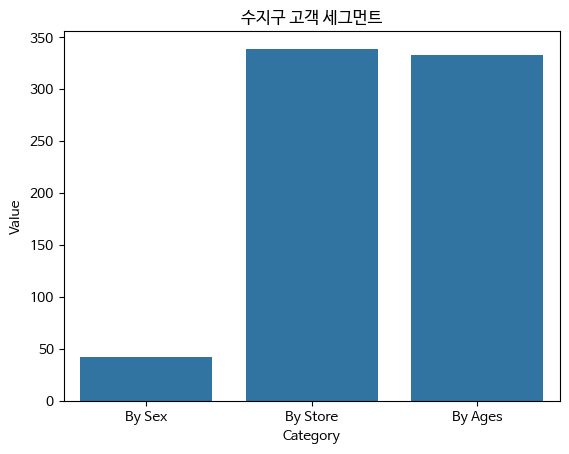

In [51]:
sns.barplot(data = df_suji, x='Category', y='Value')
plt.title('수지구 고객 세그먼트')
plt.show

#### 고객 세그먼트 확대: 성별/연령대/구매매장 별 과일 유형

In [ ]:
# 성별 -> 유의수준 0.05 이하, statistic = 41.8
df_fruit_category_pivot_by_sex = pd.pivot_table(df_fruit[['물품소분류', '성별']]
               , index='물품소분류', columns='성별', aggfunc=len)
statistic_by_sex, pvalue_by_sex, dof_by_sex, expected_freq_by_sex = stats.chi2_contingency(observed=df_fruit_category_pivot_by_sex.dropna(), correction=True)
statistic_by_sex, pvalue_by_sex, dof_by_sex, expected_freq_by_sex

In [ ]:
# 구매매장 -> 유의수준 0.05 이하, statistic = 374.16
df_fruit_category_pivot_by_store = pd.pivot_table(df_fruit[['물품소분류', '구매매장']]
               , index='물품소분류', columns='구매매장', aggfunc=len)
statistic_by_store, pvalue_by_store, dof_by_store, expected_freq_by_store = stats.chi2_contingency(observed=df_fruit_category_pivot_by_store.dropna(), correction=True)
statistic_by_store, pvalue_by_store, dof_by_store, expected_freq_by_store

In [ ]:
# 연령대 -> 유의수준 0.05 이하, statistic = 333.36
df_fruit_category_pivot_by_ages = pd.pivot_table(df_fruit[['물품소분류', '연령대']]
               , index='물품소분류', columns='연령대', aggfunc=len)
statistic_by_ages, pvalue_by_ages, dof_by_ages, expected_freq_by_ages = stats.chi2_contingency(observed=df_fruit_category_pivot_by_ages.dropna(), correction=True)
statistic_by_ages, pvalue_by_ages, dof_by_ages, expected_freq_by_ages

In [48]:
data = {
    'Category': ['By Sex', 'By Store', 'By Ages'],
    'Value': [statistic_by_sex, statistic_by_store, statistic_by_ages]
}
df_all = pd.DataFrame(data)

<function matplotlib.pyplot.show(close=None, block=None)>

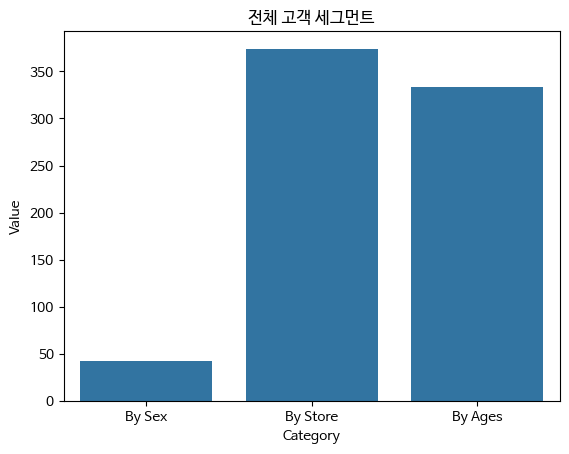

In [49]:
sns.barplot(data = df_all, x='Category', y='Value')
plt.title('전체 고객 세그먼트')
plt.show

## 분석 결과
- 통계 결과 : 대립가설 채택
- 사실 결과 : 구매매장, 성별, 연령대 와 과일 종류는 상관관계가 있으며, 성별에 비해 구매매장과 연령대가 강력한 상관관계를 띈다.
